In [1]:
from segway_control import Experiment

from scipy.integrate import solve_ivp
import numpy as np
import cvxpy as cp

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
''' Параметры системы '''
ex = Experiment()
eigA = np.linalg.eigvals(ex.A)
# eigA = eigA.astype(complex)
eigA

array([ 0.        ,  0.52145782, -2.05987963, -7.502976  ])

In [3]:
''' Время и начальные значения '''
t = (0, 20)
x0 = np.array([-0.1, -0.1, 0.1, 0.1])

In [4]:
''' Желаемые собственные числа и коэффициенты управления '''
pref_eigA = eigA.copy()
pref_eigA[1] = -0.521
theta = ex.ackermann_control(pref_eigA)
pref_eigA, theta

(array([ 0.        , -0.521     , -2.05987963, -7.502976  ]),
 array([[-306.48002125,   -0.        , -148.45695167,   15.22455594]]))

In [5]:
''' Непрерывная линейная система '''
lin_sol = solve_ivp(ex.lin_func, t, x0, args=(theta,), method='LSODA')

In [6]:
''' Непрерывная нелинейная система '''
nonlin_sol = solve_ivp(ex.nonlin_func, t, x0, args=(theta,), method='LSODA')

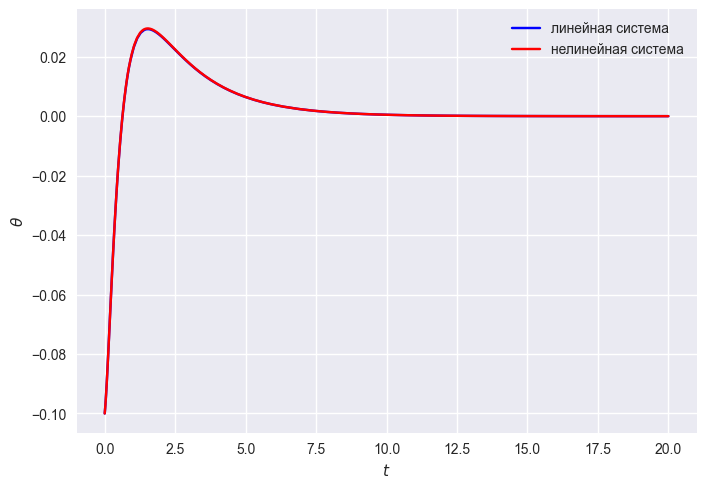

In [7]:
plt.plot(lin_sol.t, lin_sol.y[0], label='линейная система', color='blue')
plt.plot(nonlin_sol.t, nonlin_sol.y[0], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\theta$')
plt.legend()

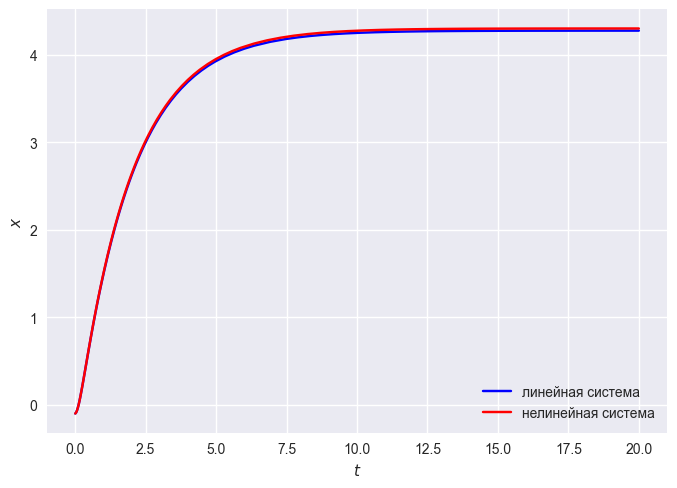

In [8]:
plt.plot(lin_sol.t, lin_sol.y[1], label='линейная система', color='blue')
plt.plot(nonlin_sol.t, nonlin_sol.y[1], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()

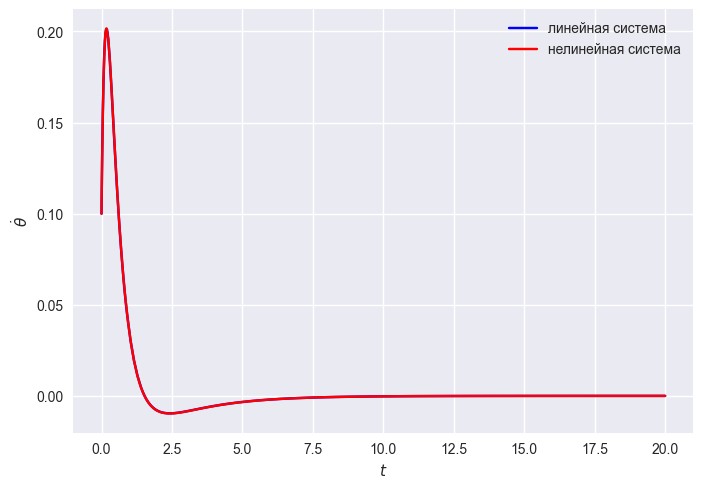

In [9]:
plt.plot(lin_sol.t, lin_sol.y[2], label='линейная система', color='blue')
plt.plot(nonlin_sol.t, nonlin_sol.y[2], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\dot{\\theta}$')
plt.legend()

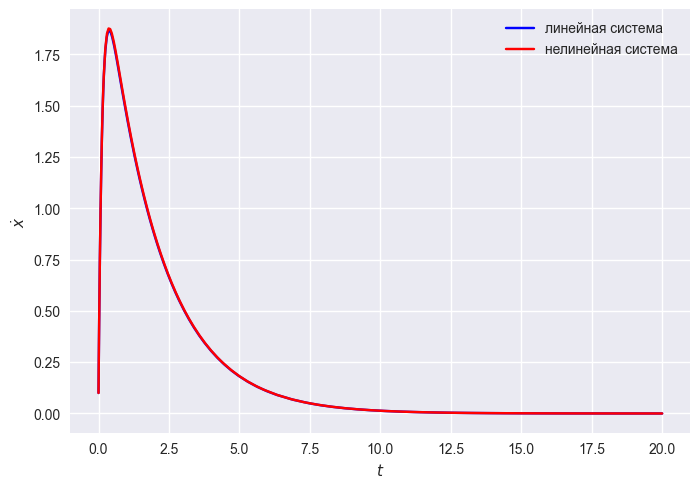

In [10]:
plt.plot(lin_sol.t, lin_sol.y[3], label='линейная система', color='blue')
plt.plot(nonlin_sol.t, nonlin_sol.y[3], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\dot{x}$')
plt.legend()